<a href="https://colab.research.google.com/github/medqbs/tokyo_houses_prices_prediction/blob/main/tokyo_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from pandas.plotting import scatter_matrix
from scipy import stats
from keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline

print("Libraries imported.")
print(tf.__version__)

Libraries imported.
2.8.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/tokyo_cleaned_data_1m.csv"

tokyo_data = pd.read_csv(path, index_col=0)
tokyo_data.head()

,type,transaction_period,building_structure,city_planning,construction_year,location,nearest_station,distance_to_station,area,building_age,maximum_coverage_ratio,maximum_floor_area_ratio,price
0,"Pre-owned Condominiums, etc.",4th quarter 2020,RC,Commercial Zone,2007,Iidabashi,Iidabashi,5,35,13,0.8,5.0,4807.32
1,"Pre-owned Condominiums, etc.",4th quarter 2020,RC,Commercial Zone,2003,Iidabashi,Iidabashi,5,20,17,0.8,5.0,1874.04
2,"Pre-owned Condominiums, etc.",4th quarter 2020,RC,Commercial Zone,2003,Iidabashi,Iidabashi,5,20,17,0.8,5.0,2118.48
3,"Pre-owned Condominiums, etc.",3rd quarter 2020,RC,Commercial Zone,2007,Iidabashi,Iidabashi,4,60,13,0.8,5.0,7170.24
4,"Pre-owned Condominiums, etc.",2nd quarter 2020,SRC,Commercial Zone,1985,Iidabashi,Iidabashi,3,95,35,0.8,7.0,4725.84


In [4]:
tokyo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132367 entries, 0 to 132366
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   type                      132367 non-null  object 
 1   transaction_period        132367 non-null  object 
 2   building_structure        132367 non-null  object 
 3   city_planning             132367 non-null  object 
 4   construction_year         132367 non-null  int64  
 5   location                  132367 non-null  object 
 6   nearest_station           132361 non-null  object 
 7   distance_to_station       132367 non-null  int64  
 8   area                      132367 non-null  int64  
 9   building_age              132367 non-null  int64  
 10  maximum_coverage_ratio    132367 non-null  float64
 11  maximum_floor_area_ratio  132367 non-null  float64
 12  price                     132367 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory us

In [5]:
selected_columns = ["location","building_structure","nearest_station","distance_to_station",
                    "area","maximum_coverage_ratio",
                    "maximum_floor_area_ratio","building_age","price"]

num_attributes = ["distance_to_station","area","maximum_coverage_ratio",
                    "maximum_floor_area_ratio","building_age"]

cat_attributes = ["building_structure","location","nearest_station"]

label = "price"

In [6]:
dataset = tokyo_data[selected_columns].copy()

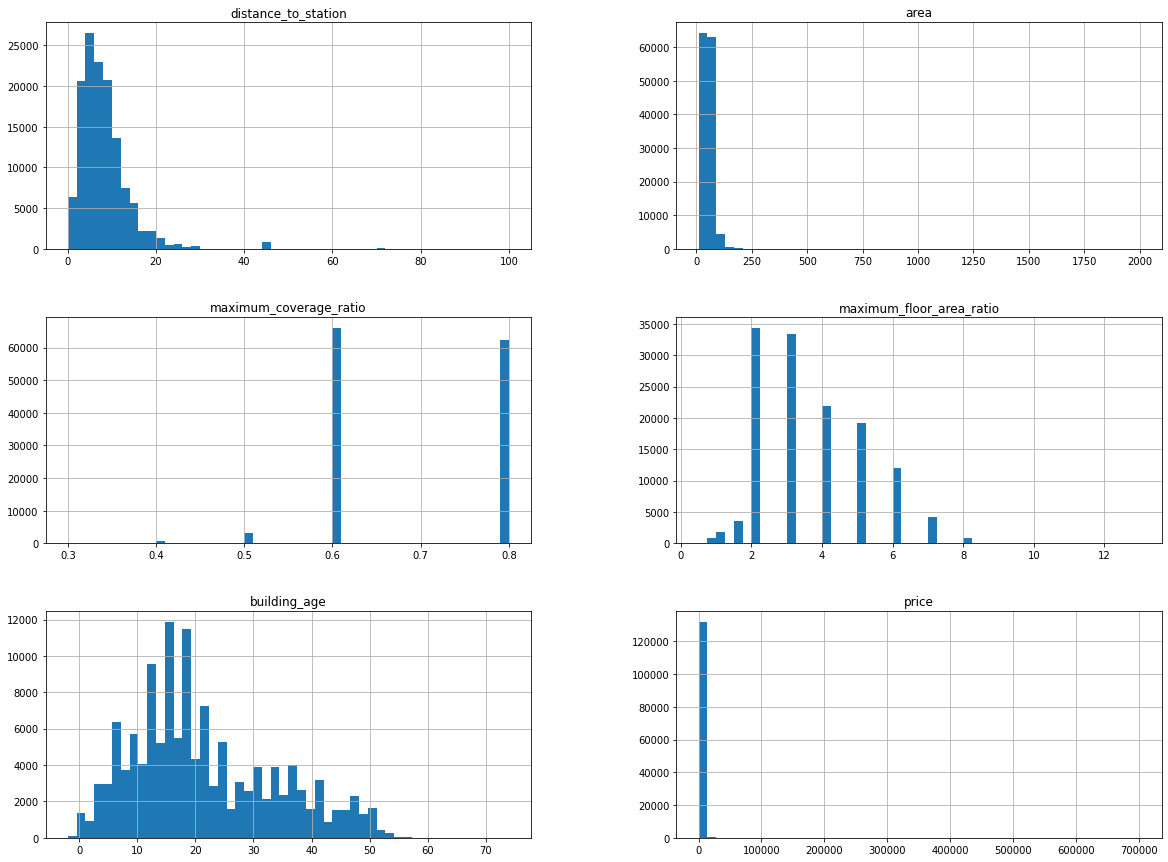

In [7]:
# historgram plots

dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
# check for correlations 

corr_matrix = dataset.corr()
print(corr_matrix["price"].sort_values(ascending=False))

price                       1.000000
area                        0.559640
maximum_floor_area_ratio    0.022242
maximum_coverage_ratio     -0.049715
distance_to_station        -0.059818
building_age               -0.205134
Name: price, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f393af45910>,
      dtype=object)

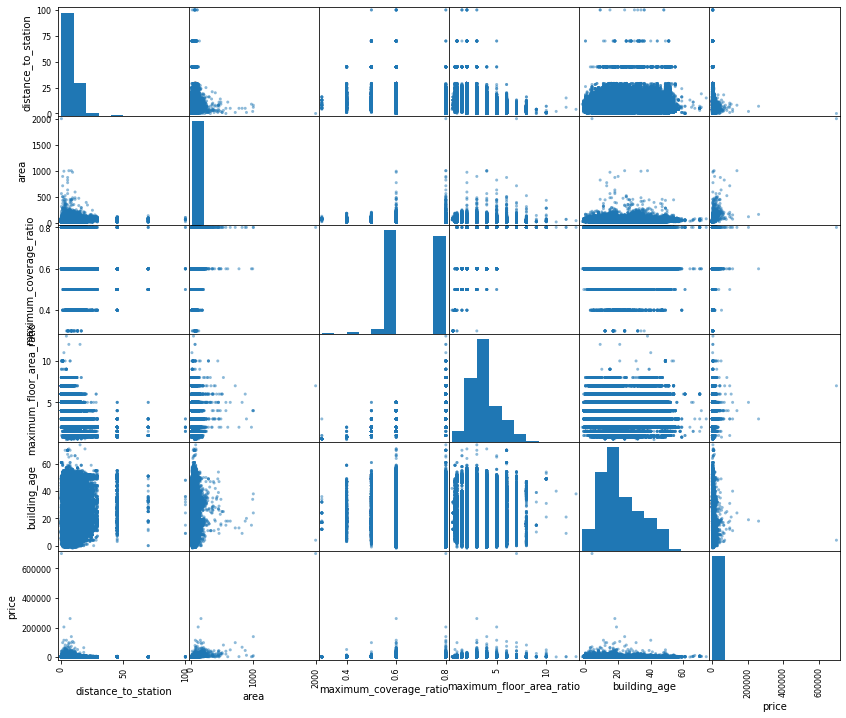

In [9]:
scatter_matrix(dataset, figsize=(14, 12))

In [10]:
# split the dataset

train_set, test_set = train_test_split(dataset, test_size=0.1, random_state=42)
print(len(train_set))
print(len(test_set))

119130
13237


# Linear Regression Models


In [11]:
def lin_reg(x):
    lm = LinearRegression()

    pearson_coef, p_value = stats.pearsonr(train_set[x], train_set["price"])
    print("Pearson Coefficient =",pearson_coef, "and P-value =", p_value)
    print("")

    lm.fit(train_set[[x]], train_set["price"])

    print("Slope: ", lm.coef_)
    print("Intercept: ", lm.intercept_)
    print("")
    if float(lm.coef_) >= 0:
        print("Linear Model: price =", lm.intercept_, "+", float(lm.coef_), "*", x)
    else:
        print("Linear Model: price =", lm.intercept_, float(lm.coef_), "*", x)

In [12]:
area_lm = lin_reg("area")

Pearson Coefficient = 0.567038325588464 and P-value = 0.0

Slope:  [68.30001686]
Intercept:  -458.08724726037826

Linear Model: price = -458.08724726037826 + 68.30001685502293 * area


In [13]:
building_age_lm = lin_reg("building_age")

Pearson Coefficient = -0.20510192069503846 and P-value = 0.0

Slope:  [-54.78921813]
Intercept:  3957.1288811455197

Linear Model: price = 3957.1288811455197 -54.78921813427132 * building_age


In [14]:
time_to_station = lin_reg("distance_to_station")

Pearson Coefficient = -0.05932828714515012 and P-value = 2.3798003566076054e-93

Slope:  [-34.06922357]
Intercept:  3044.071668827689

Linear Model: price = 3044.071668827689 -34.069223570601096 * distance_to_station


# Multiple Linear Regression Model

In [15]:
# Multiple linear regression model using all numerical attributes. 

mul_reg = LinearRegression()

mul_reg.fit(train_set[num_attributes], train_set[label])

print("Slope: ", mul_reg.coef_)
print("Intercept: ", mul_reg.intercept_)

Slope:  [  -70.01482571    73.74301814 -1286.31584107   298.60047701
   -49.27213558]
Intercept:  696.7505963005428


In [16]:
lin_predictions = mul_reg.predict(train_set[num_attributes])
lin_mse = mean_squared_error(train_set[label], lin_predictions)
lin_rmse = np.sqrt(lin_mse)
print("Prediction error: $",int(lin_rmse))

Prediction error: $ 2555


In [17]:
# function that compares predictions vs actual values

def plot_com(actual, preds):
    plt.figure(figsize=(12, 8))

    ax1 = sns.distplot(actual, hist=False, color="r", label="Actual Value")
    sns.distplot(preds, hist=False, color="b", label="Fitted Values" , ax=ax1)

    plt.title('Actual vs Fitted Values for Price')
    plt.xlabel('Price (in dollars)')

    plt.show()
    plt.close()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


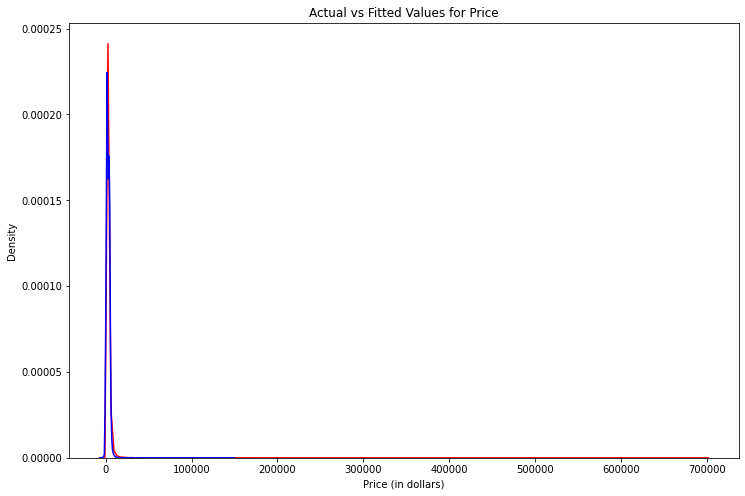

In [18]:
plot_com(train_set[label], lin_predictions)

# Decision Tree Regression Model


In [19]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_set[num_attributes], train_set[label])

DecisionTreeRegressor(random_state=42)

In [20]:
tree_predictions = tree_reg.predict(train_set[num_attributes])
tree_mse = mean_squared_error(train_set[label], tree_predictions)
tree_rmse = np.sqrt(tree_mse)
print("Prediction error: $",int(tree_rmse))

Prediction error: $ 980


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


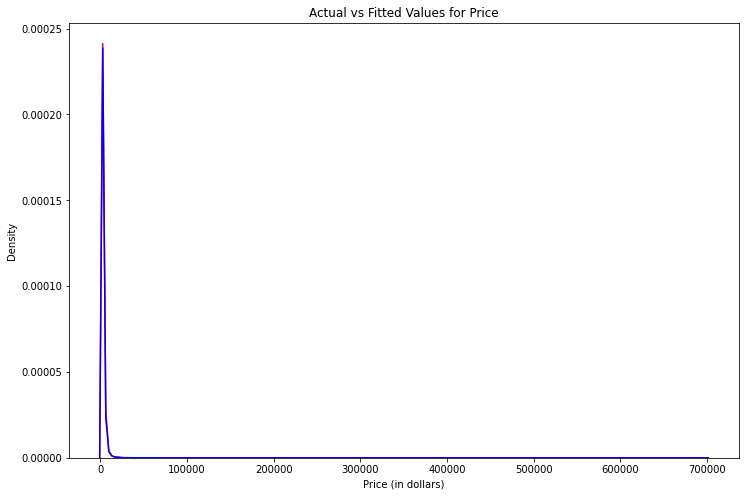

In [21]:
plot_com(train_set[label], tree_predictions)

# Random Forest Regression Model


In [22]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_set[num_attributes], train_set[label])

RandomForestRegressor(random_state=42)

In [23]:
forest_predictions = forest_reg.predict(train_set[num_attributes])
forest_mse = mean_squared_error(train_set[label], forest_predictions)
forest_rmse = np.sqrt(forest_mse)
print("Prediction error: $",int(forest_rmse))

Prediction error: $ 1278


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


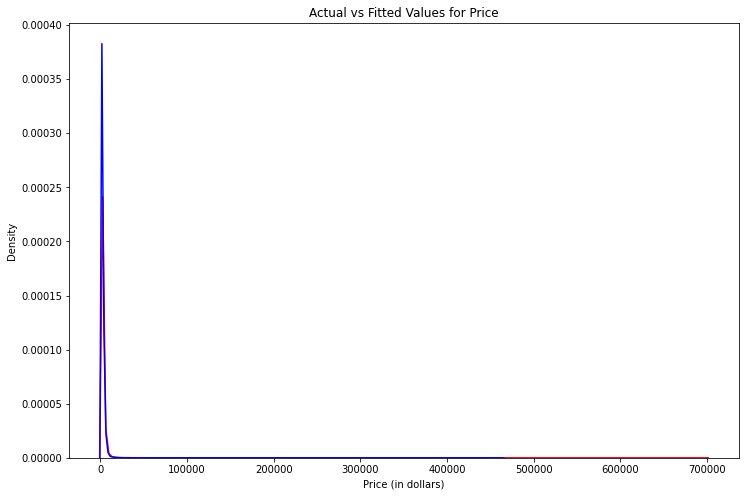

In [24]:
plot_com(train_set[label], forest_predictions)

# Linear Regression Model with Polynomial Features


In [25]:
input = [("scale",StandardScaler()),
         ("polynomial",PolynomialFeatures(include_bias=False)),
         ("model",LinearRegression())]

pipe = Pipeline(input)
pipe.fit(train_set[num_attributes], train_set[label])

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [26]:
pipe_predictions = pipe.predict(train_set[num_attributes])
pipe_mse = mean_squared_error(train_set[label], pipe_predictions)
pipe_rmse = np.sqrt(pipe_mse)
print("Prediction error: $",int(pipe_rmse))

Prediction error: $ 2015


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


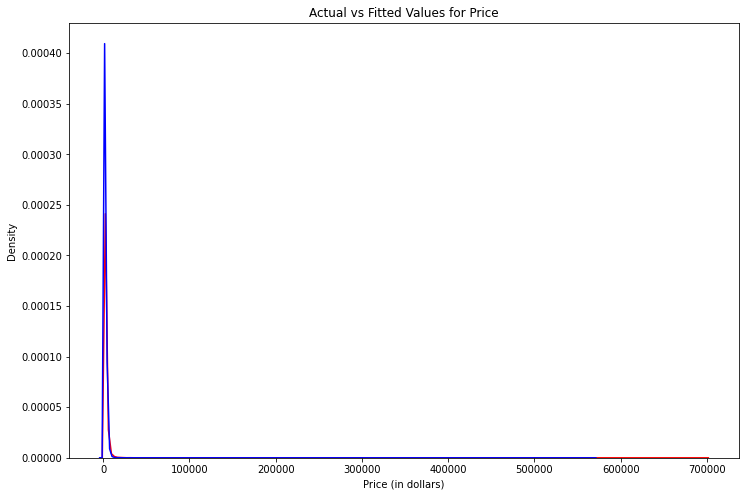

In [27]:
plot_com(train_set[label], pipe_predictions)

# Deep Neural Network Regression Model


In [29]:
# import normalized data for DNN model

path = "/content/drive/MyDrive/tokyo_data_norm_1m.csv"

norm_data = pd.read_csv(path, index_col=0)

norm_dataset = norm_data.copy()
norm_dataset.head(2)

,distance_to_station,area,maximum_coverage_ratio,maximum_floor_area_ratio,building_age,price
0,0.05,0.012563,1.0,0.36,0.197368,0.006833
1,0.05,0.005025,1.0,0.36,0.250000,0.002647


In [30]:
# features

X = norm_dataset.iloc[:, :5]
print(X.head())

# labels

Y = norm_dataset.iloc[:, -1]
print(Y.head())

   distance_to_station      area  maximum_coverage_ratio  \
0                 0.05  0.012563                     1.0   
1                 0.05  0.005025                     1.0   
2                 0.05  0.005025                     1.0   
3                 0.04  0.025126                     1.0   
4                 0.03  0.042714                     1.0   

   maximum_floor_area_ratio  building_age  
0                      0.36      0.197368  
1                      0.36      0.250000  
2                      0.36      0.250000  
3                      0.36      0.197368  
4                      0.52      0.486842  
0    0.006833
1    0.002647
2    0.002995
3    0.010205
4    0.006716
Name: price, dtype: float64


In [31]:
X_arr = X.values
Y_arr = Y.values

print("X_arr shape: ", X_arr.shape)
print("Y_arr shape: ", Y_arr.shape)

X_arr shape:  (132367, 5)
Y_arr shape:  (132367,)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, Y_arr, test_size = 0.1, shuffle = True, random_state=0)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (119130, 5)
y_train shape:  (119130,)
X_test shape:  (13237, 5)
y_test shape:  (13237,)


In [33]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [34]:
def dnn_model():
    
    model = Sequential([
        Dense(10, input_shape = (5,), activation = "relu"),
        Dense(20, activation = "relu"),
        Dense(5, activation = "relu"),
        Dense(1)])

    model.compile(
        optimizer = "rmsprop", 
        loss = root_mean_squared_error, 
        metrics = ["accuracy"])
    
    return model

dnn_reg = dnn_model()
dnn_reg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________


In [35]:
early_stopping = EarlyStopping(monitor="val_loss", patience = 5)

preds_on_untrained = dnn_reg.predict(X_test)

history = dnn_reg.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 100,
    callbacks = [early_stopping],
    verbose = 0)

In [36]:
print("---Training loss---")
print(history.history["loss"])
print("")
print("---Validation loss---")
print(history.history["val_loss"])

---Training loss---
[0.004985578823834658, 0.0025647194124758244, 0.002172718523070216, 0.0020981309935450554, 0.00206467742100358, 0.002048114314675331, 0.002030499279499054, 0.0020242270547896624, 0.0020125359296798706, 0.0020168288610875607, 0.002014359226450324, 0.0020068807061761618, 0.0020043111871927977, 0.002004710491746664, 0.002001520013436675, 0.0020006175618618727, 0.001997079700231552, 0.0019924279768019915]

---Validation loss---
[0.003246696200221777, 0.0025964193046092987, 0.002216794528067112, 0.0024204349610954523, 0.002187806647270918, 0.002223807154223323, 0.0025130228605121374, 0.0020828954875469208, 0.0020174358505755663, 0.0020143245346844196, 0.00222164299339056, 0.002089792164042592, 0.002005986636504531, 0.0021354625932872295, 0.0021237798500806093, 0.0022401108872145414, 0.002435262082144618, 0.002066195709630847]


In [37]:
price_max = dataset["price"].max()
print(price_max)
price_min = dataset["price"].min()
print(price_min)

def convert_price_values(pred):
    return int((pred*(price_max-price_min) + price_min))

700728.0
19.5552


In [38]:
loss_usd = []

for l in history.history["loss"]:
    loss_usd.append(convert_price_values(l))

In [39]:
val_loss_usd = []

for l in history.history["val_loss"]:
    val_loss_usd.append(convert_price_values(l))

In [40]:
print("Prediction loss:",loss_usd)
print("Validation loss:",val_loss_usd)

Prediction loss: [3512, 1816, 1541, 1489, 1466, 1454, 1442, 1437, 1429, 1432, 1431, 1425, 1423, 1424, 1422, 1421, 1418, 1415]
Validation loss: [2294, 1838, 1572, 1715, 1552, 1577, 1780, 1479, 1433, 1431, 1576, 1483, 1425, 1515, 1507, 1589, 1725, 1467]


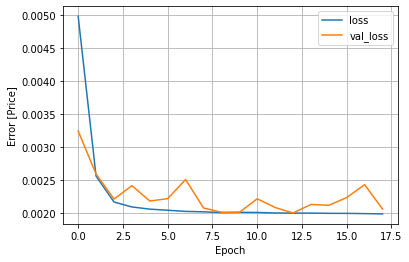

In [41]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [Price]')
    plt.legend()
    plt.grid(True)

plot_loss(history)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


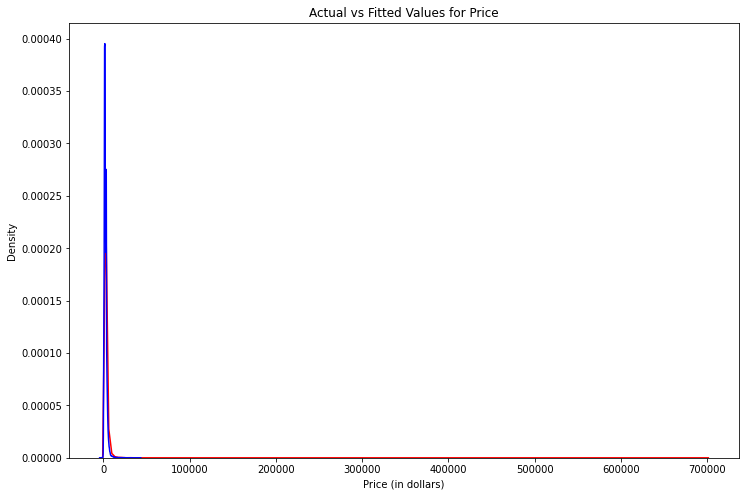

In [42]:
preds = dnn_reg.predict(X_train)

price_preds = [convert_price_values(y) for y in preds]
price_labels = [convert_price_values(y) for y in y_train]
plot_com(price_labels, price_preds)

# Decision Tree Regression with Numerical & Categorical Attributes


In [43]:
num_pipeline = Pipeline([
        ("scale",StandardScaler()),
        ("polynomial",PolynomialFeatures(include_bias=False)),
])

In [44]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", OneHotEncoder(), cat_attributes)
])

In [45]:
nc_pipe = full_pipeline.fit_transform(train_set)

In [46]:
nc_tree_reg = DecisionTreeRegressor()
nc_tree_reg.fit(nc_pipe, train_set["price"])

DecisionTreeRegressor()

In [47]:
nc_tree_predictions = nc_tree_reg.predict(nc_pipe)
nc_tree_mse = mean_squared_error(train_set["price"], nc_tree_predictions)
nc_tree_rmse = np.sqrt(nc_tree_mse)
print("Prediction error: $",int(nc_tree_rmse))

Prediction error: $ 619


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


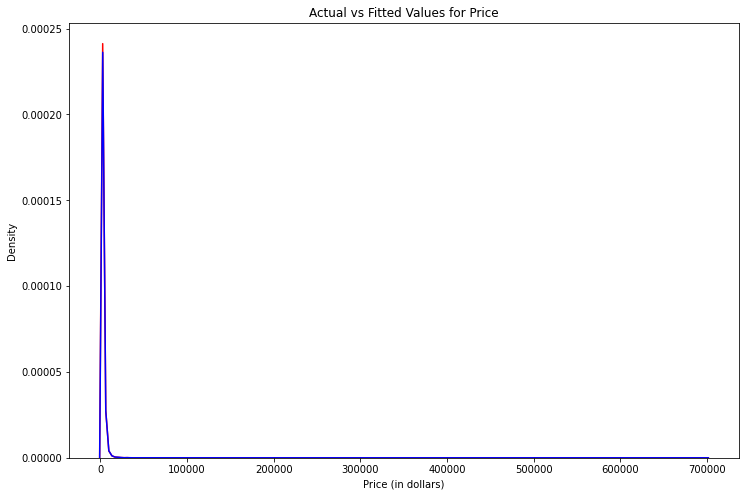

In [48]:
plot_com(train_set[label], nc_tree_predictions)

# Multiple Linear Regression with Interaction Terms


In [49]:
# create interaction terms
interaction = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(train_set[num_attributes])

In [50]:
inter_reg = LinearRegression()
inter_reg.fit(X_inter, train_set[label])

LinearRegression()

In [51]:
inter_predictions = inter_reg.predict(X_inter)
inter_mse = mean_squared_error(train_set[label], inter_predictions)
inter_rmse = np.sqrt(inter_mse)
print("Prediction error: $",int(inter_rmse))

Prediction error: $ 2010


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


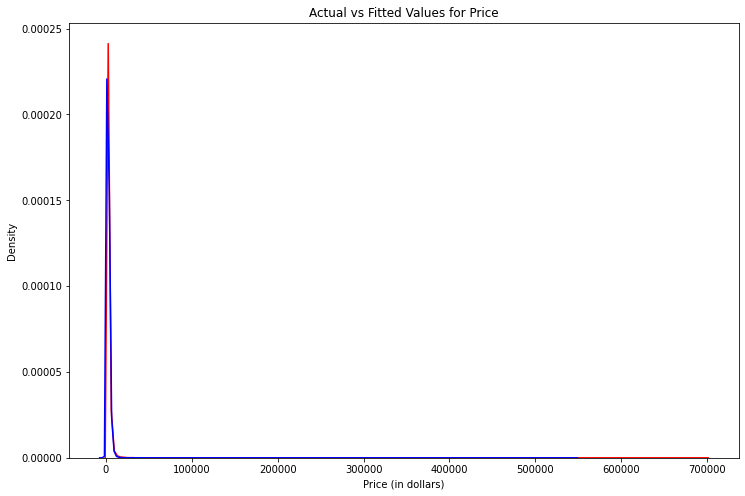

In [52]:
plot_com(train_set[label], inter_predictions)

# Model Performances on Train Dataset


In [53]:
models_errors = {"Model":["Multiple Linear Regression","Decision Tree Regression","Random Forest Regression",
                          "DNN Regression", "MLR with Polynomial Features","MLR with Interaction Terms",
                          "Decision Tree with Num&Cat Attributes"],
                  "Prediction Error (USD)":[lin_rmse,tree_rmse,forest_rmse,
                                            convert_price_values(history.history["loss"][-1]),
                                            pipe_rmse,inter_rmse,nc_tree_rmse]}

com_table = pd.DataFrame(data=models_errors)

In [54]:
com_table.sort_values(by=["Prediction Error (USD)"], inplace=True, ascending=False)
com_table.reset_index(drop=True, inplace=True)
com_table

,Model,Prediction Error (USD)
0,Multiple Linear Regression,2555.626038
1,MLR with Polynomial Features,2015.366078
2,MLR with Interaction Terms,2010.357381
3,DNN Regression,1415.000000
4,Random Forest Regression,1278.778609
5,Decision Tree Regression,980.550648
6,Decision Tree with Num&Cat Attributes,619.533755
